In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [46]:
def result_parser(filename):
    df = pd.read_csv(exp_path+filename,index_col=0)
    name_info = filename[:-23].split('_')
    model_name = name_info[0]
    if name_info[1] in ['ELIC','HiFiC','jpeg']:
        defense = name_info[1]
    else:
        defense = 'None'
    attack = None
    for a in ['FGSM','iFGSM','PGD','DeepFool','CW']:
        if a in name_info:
            attack = a
    through = False
    if name_info[-1] == 'through':
        through = True
    return [model_name,attack,defense,through]+[v for v in df.values[0]]
    

def line_print(i):
    if i%14 == 0:
        line = '\\hline'
    elif i%7 ==0:
        line = '\\cline{2-8}'
    elif i%7 in [1,3,5]:
        line = '\\cline{3-8}'
    else:
        line = '\\cline{4-8}'
    return line
    
cell_colors= 'lightgray,lightblue,darkblue,lightred,darkred,lightgreen,darkgreen'.split(',')
def cell_color(i):
    return cell_colors[(i-1)%7]
    
colors={'None':'gray','jpeg':'blue', 'HiFiC':'red','ELIC':'green'}
def plot_row(df,title,ax,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,3]:
            ax.plot([0,*df.columns[5:]], df.iloc[i,4:], marker='o', label=df.iloc[i,2]+'_T',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot([0,*df.columns[5:]], df.iloc[i,4:], marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy')
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    order = [4,6,5,3,2,1,0]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    #plt.savefig(f'{f_name}.pdf',format='pdf')
    #plt.show()
    return ax


In [47]:
exp_path = 'results/imagenette/'
results = pd.DataFrame(columns=['model_name','attack','defense','through','baseline','2/255','4/255','6/255','8/255','10/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results.loc[i] = result_parser(f)
results

,model_name,attack,defense,through,baseline,2/255,4/255,6/255,8/255,10/255,12/255
0,ResNet50,FGSM,ELIC,True,0.982930,0.921019,0.868280,0.836943,0.820892,0.808662,0.797707
1,ResNet50,PGD,ELIC,True,0.982930,0.803567,0.580382,0.424968,0.321274,0.262166,0.214522
2,ResNet50,iFGSM,ELIC,True,0.982930,0.785223,0.538344,0.384713,0.292994,0.220892,0.178344
3,ResNet50,FGSM,ELIC,False,0.982930,0.983185,0.979363,0.981146,0.979873,0.978599,0.979873
4,ResNet50,PGD,ELIC,False,0.982930,0.982420,0.982675,0.979108,0.980127,0.978854,0.976561
5,ResNet50,iFGSM,ELIC,False,0.982930,0.982420,0.980127,0.980127,0.980637,0.978599,0.976561
6,ResNet50,FGSM,HiFiC,True,0.975032,0.856051,0.805096,0.785987,0.774522,0.764331,0.758981
7,ResNet50,PGD,HiFiC,True,0.975032,0.634650,0.409682,0.281274,0.216051,0.171465,0.132994
8,ResNet50,iFGSM,HiFiC,True,0.975032,0.613248,0.378854,0.259363,0.200510,0.158726,0.125350
9,ResNet50,FGSM,HiFiC,False,0.975032,0.973248,0.968153,0.963312,0.958217,0.953376,0.949299


In [48]:
exp_path = 'results/exp_l2/'
results_l2 = pd.DataFrame(columns=['model_name','attack','defense','through','baseline','2','4','5','6','7','8','16','32',])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_l2.loc[i] = result_parser(f)
results_l2




    

,model_name,attack,defense,through,baseline,2,4,5,6,7,8,16,32
0,ResNet50,CW,ELIC,True,0.998217,0.997452,0.958217,0.869045,0.724076,0.553885,0.428535,0.225478,0.225478
1,ResNet50,DeepFool,ELIC,True,0.998217,0.980892,0.916943,0.876178,0.830318,0.780382,0.738089,0.559236,0.541147
2,ResNet50,CW,ELIC,False,0.998217,0.997962,0.997962,0.997962,0.997707,0.997197,0.997197,0.997197,0.997197
3,ResNet50,DeepFool,ELIC,False,0.998217,0.997962,0.997962,0.997962,0.997962,0.997962,0.997962,0.997962,0.997962
4,ResNet50,CW,HiFiC,True,0.975032,0.975032,0.972229,0.960510,0.932229,0.899618,0.867771,0.596433,0.595924
5,ResNet50,DeepFool,HiFiC,True,0.975032,0.905733,0.797197,0.743185,0.690191,0.638217,0.589554,0.355669,0.280764
6,ResNet50,CW,HiFiC,False,0.975032,0.975032,0.974777,0.975287,0.975287,0.975032,0.974777,0.974777,0.974777
7,ResNet50,DeepFool,HiFiC,False,0.975032,0.975032,0.975287,0.975032,0.975032,0.975032,0.975032,0.975032,0.975032
8,ResNet50,CW,None,False,0.998471,0.998471,0.943949,0.787006,0.528917,0.304459,0.193376,0.054013,0.051465
9,ResNet50,DeepFool,None,False,0.998471,0.786752,0.540637,0.492739,0.463949,0.451720,0.447389,0.442548,0.442548


In [49]:
def line_print(i):
    if i%14 == 0:
        line = '\\hline'
    elif i%7 ==0:
        line = '\\cline{2-11}'
    elif i%7 in [1,3,5]:
        line = '\\cline{3-11}'
    else:
        line = '\\cline{4-11}'
    return line

attacks = 'FGSM,iFGSM,PGD'.split(',')
defenses = 'None,jpeg,ELIC,HiFiC'.split(',')
models = 'ResNet50,Vit'.split(',')
results = results.round(3)

i = 1
for attack in attacks:
    a = '\\multirow{14}{*}{'+f'{attack}'+'}'
    for model in models:
        m = '\\multirow{7}{*}{'+f'{model}'+'}'
        for defense in defenses:
            l = len(results.loc[results['attack'] == attack].loc[results['model_name'] == model].loc[results['defense'] == defense])
            if l > 1:
                d = '\\multirow{'+f'{l}'+'}{*}{'+f'{defense}'+'}'
            else:
                d = defense
            for t in [False,True]:
                r = results.loc[results['attack'] == attack].loc[results['model_name'] == model].loc[results['defense'] == defense].loc[results['through'] == t].values
                try:
                    print(a,' & ',m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3,4,5,6,7,8,9]],'\cellcolor{'+ cell_color(i) + '}',r[0,10],'\\\\ ', line_print(i))
                    a,m,d = ' ',' ',' '
                    i = i+1
                except IndexError:
                    pass

\multirow{14}{*}{FGSM}  &  \multirow{7}{*}{ResNet50}  &  None  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.998 &  \cellcolor{lightgray}0.923 &  \cellcolor{lightgray}0.922 &  \cellcolor{lightgray}0.926 &  \cellcolor{lightgray}0.929 &  \cellcolor{lightgray}0.935 &  \cellcolor{lightgray} 0.937 \\  \cline{3-11}
   &     &  \multirow{2}{*}{jpeg}  &  \cellcolor{lightblue}False &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue}0.994 &  \cellcolor{lightblue}0.99 &  \cellcolor{lightblue}0.984 &  \cellcolor{lightblue}0.979 &  \cellcolor{lightblue}0.974 &  \cellcolor{lightblue} 0.971 \\  \cline{4-11}
   &     &     &  \cellcolor{darkblue}True &  \cellcolor{darkblue}0.996 &  \cellcolor{darkblue}0.908 &  \cellcolor{darkblue}0.898 &  \cellcolor{darkblue}0.893 &  \cellcolor{darkblue}0.895 &  \cellcolor{darkblue}0.893 &  \cellcolor{darkblue} 0.894 \\  \cline{3-11}
   &     &  \multirow{2}{*}{ELIC}  &  \cellcolor{lightred}False &  \cellcolor{lightred}0.983 &  \cellcolor{lightred}0.983 &

<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_58750/1011123454.py:31: SyntaxWarning: invalid escape sequence '\c'
  print(a,' & ',m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3,4,5,6,7,8,9]],'\cellcolor{'+ cell_color(i) + '}',r[0,10],'\\\\ ', line_print(i))
/tmp/ipykernel_58750/1011123454.py:31: SyntaxWarning: invalid escape sequence '\c'
  print(a,' & ',m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3,4,5,6,7,8,9]],'\cellcolor{'+ cell_color(i) + '}',r[0,10],'\\\\ ', line_print(i))


In [50]:
r_ifgsm = results.loc[results['attack'] == 'iFGSM']
r_ifgsm

,model_name,attack,defense,through,baseline,2/255,4/255,6/255,8/255,10/255,12/255
2,ResNet50,iFGSM,ELIC,True,0.983,0.785,0.538,0.385,0.293,0.221,0.178
5,ResNet50,iFGSM,ELIC,False,0.983,0.982,0.980,0.980,0.981,0.979,0.977
8,ResNet50,iFGSM,HiFiC,True,0.975,0.613,0.379,0.259,0.201,0.159,0.125
11,ResNet50,iFGSM,HiFiC,False,0.975,0.974,0.971,0.966,0.962,0.958,0.958
14,ResNet50,iFGSM,None,False,0.998,0.111,0.065,0.052,0.040,0.031,0.024
17,ResNet50,iFGSM,jpeg,True,0.996,0.423,0.290,0.237,0.210,0.185,0.168
20,ResNet50,iFGSM,jpeg,False,0.996,0.994,0.992,0.989,0.985,0.979,0.971
23,Vit,iFGSM,ELIC,True,0.992,0.790,0.500,0.311,0.196,0.127,0.086
26,Vit,iFGSM,ELIC,False,0.992,0.986,0.981,0.975,0.968,0.959,0.947
29,Vit,iFGSM,HiFiC,True,0.995,0.567,0.262,0.130,0.080,0.051,0.036


In [51]:
r_ifgsm.iloc[:,4:] = (r_ifgsm.round(2).iloc[:,4:]*100).astype('int')
r_ifgsm

,model_name,attack,defense,through,baseline,2/255,4/255,6/255,8/255,10/255,12/255
2,ResNet50,iFGSM,ELIC,True,98.0,78.0,54.0,38.0,28.0,22.0,18.0
5,ResNet50,iFGSM,ELIC,False,98.0,98.0,98.0,98.0,98.0,98.0,98.0
8,ResNet50,iFGSM,HiFiC,True,98.0,61.0,38.0,26.0,20.0,16.0,12.0
11,ResNet50,iFGSM,HiFiC,False,98.0,97.0,97.0,97.0,96.0,96.0,96.0
14,ResNet50,iFGSM,None,False,100.0,11.0,6.0,5.0,4.0,3.0,2.0
17,ResNet50,iFGSM,jpeg,True,100.0,42.0,28.0,24.0,21.0,18.0,17.0
20,ResNet50,iFGSM,jpeg,False,100.0,99.0,99.0,99.0,98.0,98.0,97.0
23,Vit,iFGSM,ELIC,True,99.0,79.0,50.0,31.0,20.0,13.0,9.0
26,Vit,iFGSM,ELIC,False,99.0,99.0,98.0,98.0,97.0,96.0,95.0
29,Vit,iFGSM,HiFiC,True,100.0,56.0,26.0,13.0,8.0,5.0,4.0


In [52]:
def line_print(i):
    if i%14 == 0:
        line = '\\hline'
    elif i%7 ==0:
        line = '\\cline{1-7}'
    elif i%7 in [1,3,5]:
        line = '\\cline{2-7}'
    else:
        line = '\\cline{3-7}'
    return line
i = 1
for model in models:
    m = '\\multirow{7}{*}{'+f'{model}'+'}'
    for defense in defenses:
        l = len(r_ifgsm.loc[r_ifgsm['model_name'] == model].loc[r_ifgsm['defense'] == defense])
        if l > 1:
            d = '\\multirow{'+f'{l}'+'}{*}{'+f'{defense}'+'}'
        else:
            d = defense
        for t in [False,True]:
            r = r_ifgsm.loc[r_ifgsm['model_name'] == model].loc[r_ifgsm['defense'] == defense].loc[r_ifgsm['through'] == t].values
            try:
                print(m,' & ',d,' & ',*(['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3]]+['\cellcolor{'+ cell_color(i) + '}'+ str(int(r[0,j]))+' & ' for j in [4,6,8]]),'\cellcolor{'+ cell_color(i) + '}',int(r[0,10]),'\\\\ ', line_print(i))
                m,d = ' ',' '
                i = i+1
            except IndexError:
                pass

<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
<>:23: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_58750/3690212459.py:23: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*(['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3]]+['\cellcolor{'+ cell_color(i) + '}'+ str(int(r[0,j]))+' & ' for j in [4,6,8]]),'\cellcolor{'+ cell_color(i) + '}',int(r[0,10]),'\\\\ ', line_print(i))
/tmp/ipykernel_58750/3690212459.py:23: SyntaxWarning: invalid escape sequence '\c'
  print(m,' & ',d,' & ',*(['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3]]+['\cellcolor{'+ cell_color(i) + '}'+ str(int(r[0,j]))+' & ' for j in [4,6,8]]),'\cellcolor{'+ cell_color(i) + '}',int(r[0,10]),'\\\\ ', line_print(i))
/tmp/ipykernel_58750/3690212459.py:2

\multirow{7}{*}{ResNet50}  &  None  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}100 &  \cellcolor{lightgray}6 &  \cellcolor{lightgray}4 &  \cellcolor{lightgray} 2 \\  \cline{2-7}
   &  \multirow{2}{*}{jpeg}  &  \cellcolor{lightblue}False &  \cellcolor{lightblue}100 &  \cellcolor{lightblue}99 &  \cellcolor{lightblue}98 &  \cellcolor{lightblue} 97 \\  \cline{3-7}
   &     &  \cellcolor{darkblue}True &  \cellcolor{darkblue}100 &  \cellcolor{darkblue}28 &  \cellcolor{darkblue}21 &  \cellcolor{darkblue} 17 \\  \cline{2-7}
   &  \multirow{2}{*}{ELIC}  &  \cellcolor{lightred}False &  \cellcolor{lightred}98 &  \cellcolor{lightred}98 &  \cellcolor{lightred}98 &  \cellcolor{lightred} 98 \\  \cline{3-7}
   &     &  \cellcolor{darkred}True &  \cellcolor{darkred}98 &  \cellcolor{darkred}54 &  \cellcolor{darkred}28 &  \cellcolor{darkred} 18 \\  \cline{2-7}
   &  \multirow{2}{*}{HiFiC}  &  \cellcolor{lightgreen}False &  \cellcolor{lightgreen}98 &  \cellcolor{lightgreen}97 &  \cellcolor{ligh

In [53]:
def line_print(i):
    if i%14 == 0:
        line = '\\hline'
    elif i%7 ==0:
        line = '\\cline{2-12}'
    elif i%7 in [1,3,5]:
        line = '\\cline{3-12}'
    else:
        line = '\\cline{4-12}'
    return line


attacks = 'CW,DeepFool'.split(',')
defenses = 'None,jpeg,ELIC,HiFiC'.split(',')
models = 'ResNet50,Vit'.split(',')
results_l2 = results_l2.round(3)


i = 1
for attack in attacks:
    a = '\\multirow{14}{*}{'+f'{attack}'+'}'
    for model in models:
        m = '\\multirow{7}{*}{'+f'{model}'+'}'
        for defense in defenses:
            l = len(results_l2.loc[results_l2['attack'] == attack].loc[results_l2['model_name'] == model].loc[results_l2['defense'] == defense])
            if l > 1:
                d = '\\multirow{'+f'{l}'+'}{*}{'+f'{defense}'+'}'
            else:
                d = defense
            for t in [False,True]:
                r = results_l2.loc[results_l2['attack'] == attack].loc[results_l2['model_name'] == model].loc[results_l2['defense'] == defense].loc[results_l2['through'] == t].values
                try:
                    print(a,' & ',m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3,4,6,7,8,9,10,11]],'\cellcolor{'+ cell_color(i) + '}',r[0,12],'\\\\ ', line_print(i))
                    a,m,d = ' ',' ',' '
                    i = i+1
                except IndexError:
                    pass

\multirow{14}{*}{CW}  &  \multirow{7}{*}{ResNet50}  &  None  &  \cellcolor{lightgray}False &  \cellcolor{lightgray}0.998 &  \cellcolor{lightgray}0.944 &  \cellcolor{lightgray}0.787 &  \cellcolor{lightgray}0.529 &  \cellcolor{lightgray}0.304 &  \cellcolor{lightgray}0.193 &  \cellcolor{lightgray}0.054 &  \cellcolor{lightgray} 0.051 \\  \cline{3-12}
   &     &  \multirow{2}{*}{jpeg}  &  \cellcolor{lightblue}False &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue}0.995 &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue}0.996 &  \cellcolor{lightblue} 0.996 \\  \cline{4-12}
   &     &     &  \cellcolor{darkblue}True &  \cellcolor{darkblue}0.996 &  \cellcolor{darkblue}0.518 &  \cellcolor{darkblue}0.338 &  \cellcolor{darkblue}0.285 &  \cellcolor{darkblue}0.281 &  \cellcolor{darkblue}0.281 &  \cellcolor{darkblue}0.281 &  \cellcolor{darkblue} 0.281 \\  \cline{3-12}
   &     &  \multirow{2}{*}{ELIC}  

<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:33: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_58750/3108138450.py:33: SyntaxWarning: invalid escape sequence '\c'
  print(a,' & ',m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3,4,6,7,8,9,10,11]],'\cellcolor{'+ cell_color(i) + '}',r[0,12],'\\\\ ', line_print(i))
/tmp/ipykernel_58750/3108138450.py:33: SyntaxWarning: invalid escape sequence '\c'
  print(a,' & ',m,' & ',d,' & ',*['\cellcolor{'+ cell_color(i) + '}'+ str(r[0,j])+' & ' for j in [3,4,6,7,8,9,10,11]],'\cellcolor{'+ cell_color(i) + '}',r[0,12],'\\\\ ', line_print(i))


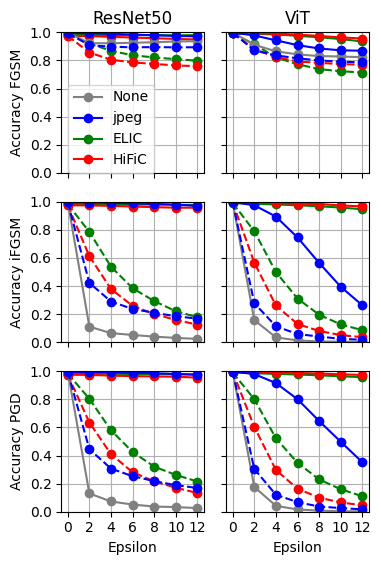

In [54]:
def plot_row(df,title,ax,attack,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    # fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,3]:
            ax.plot([0,2,4,6,8,10,12], df.iloc[i,4:], marker='o', label='_nolegend_',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot([0,2,4,6,8,10,12], df.iloc[i,4:], marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy '+attack)
    # ax.set_yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_xticks(np.arange(0, 14, 2))
    ax.set_ylim(0.0, 1.00)
   
    order = [2,3,0,1]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(.00, -0.05), loc='lower left')
    # plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    return ax

attacks = 'FGSM,iFGSM,PGD'.split(',')
fig, axes = plt.subplots(3,2,figsize=(4.0,5.75), sharex=True, sharey=True)
axs = axes.flatten()
i=0
legend = True

for attack in attacks:
    for model in models:
        df = results.loc[results['attack'] == attack].loc[results['model_name'] == model]
        plot_row(df,attack +'_' +model,axs[i],attack,legend)
        i = i+1
        legend = False
for ax,title in zip(axs, ['ResNet50','ViT']):
    ax.set_title(title)
for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()
fig.savefig('l_inf.pdf',format='pdf',bbox_inches='tight')
# fig.savefig('l_inf.svg', bbox_inches='tight')

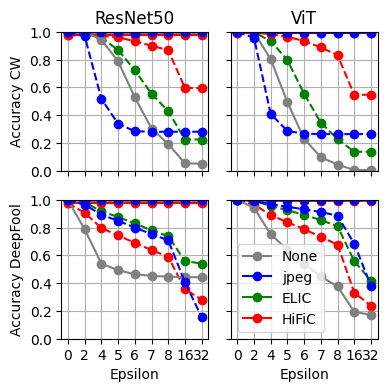

In [ ]:
def plot_row(df,title,ax,attack,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    # fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,3]:
            ax.plot('0,2,4,5,6,7,8,16,32'.split(','), df.iloc[i,4:], marker='o', label='_nolegend_',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot('0,2,4,5,6,7,8,16,32'.split(','), df.iloc[i,4:], marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy '+attack)
    # ax.set_yticks(np.arange(0.0, 1.1, 0.1))

    ax.set_ylim(0.0, 1.0)
   
    order = [2,3,0,1]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    # plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    return ax
    
attacks = 'CW,DeepFool'.split(',')
fig, axes = plt.subplots(2,2,figsize=(4.0,5.75*0.72), sharex=True, sharey=True)

axs = axes.flatten()
i=0
legend = True


for attack in attacks:
    for model in models:
        df = results_l2.loc[results_l2['attack'] == attack].loc[results_l2['model_name'] == model]
        legend = i == 3
        plot_row(df,attack +'_' +model,axs[i],attack,legend)
        i += 1
for ax,title in zip(axs, ['ResNet50','ViT']):
    ax.set_title(title)
for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()
fig.savefig('l_2.pdf',format='pdf',bbox_inches='tight')

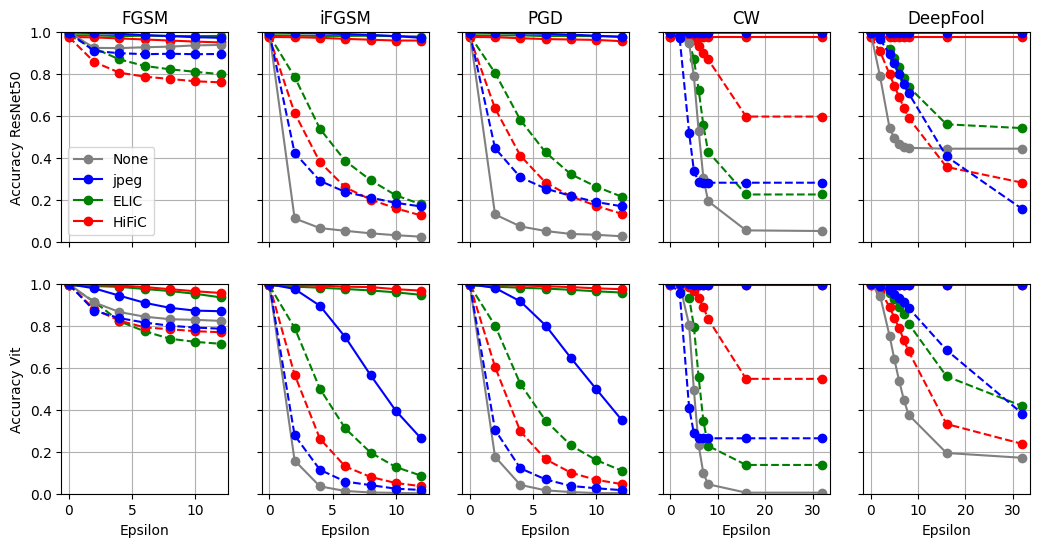

In [56]:
def plot_row(df,title,ax,attack,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    # fig, ay = plt.subplots()
    
    for i in range(len(df)):
        x = ['0',*df.columns[5:]]
        x = [int(i) if '255' not in i else int(i[:-4]) for i in x]
        y = df.iloc[i,4:]
        if df.iloc[i,3]:
            ax.plot(x, y, marker='o', label='_nolegend_',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot(x, y, marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy '+attack)
    # ax.set_yticks(np.arange(0.0, 1.1, 0.1))

    ax.set_ylim(0.0, 1.0)
   
    order = [2,3,0,1]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
    # plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    return ax
    
attacks = 'FGSM,iFGSM,PGD'.split(',')
fig, axes = plt.subplots(2, 5, figsize=(12.5,6), sharex='col', sharey='row')

axs = axes.flatten()
i=0
legend = True

for row_idx,model in enumerate(models):
    for col_idx,attack in enumerate(attacks):
        df = results.loc[results['attack'] == attack].loc[results['model_name'] == model]
        plot_row(df, attack +'_' +model,axes[row_idx, col_idx],model,legend)
        i = i+1
        legend = False
attacks = 'CW,DeepFool'.split(',')

for row_idx,model in enumerate(models):
    for col_idx,attack in enumerate(attacks):
        df = results_l2.loc[results_l2['attack'] == attack].loc[results_l2['model_name'] == model]
        plot_row(df,attack +'_' +model, axes[row_idx, col_idx+3],model,legend)
        i = i+1
for ax,title in zip(axs, ['FGSM','iFGSM','PGD','CW','DeepFool']):
    ax.set_title(title)
for ax in fig.get_axes():
    ax.label_outer()
fig.savefig('l_all.pdf',format='pdf',bbox_inches='tight')

In [57]:
exp_path = 'results/imagenet_1000/linf/'
results_1000 = pd.DataFrame(columns=['model_name','attack','defense','through','baseline','2/255','4/255','6/255','8/255','10/255','12/255'])
for i,f in enumerate(sorted(os.listdir(exp_path))):
    if not f.startswith('.'):     
        results_1000.loc[i] = result_parser(f)
results_1000

,model_name,attack,defense,through,baseline,2/255,4/255,6/255,8/255,10/255,12/255
1,ResNet50,FGSM,ELIC,True,0.596,0.364,0.299,0.278,0.263,0.255,0.257
2,ResNet50,PGD,ELIC,True,0.596,0.245,0.159,0.115,0.086,0.079,0.062
3,ResNet50,iFGSM,ELIC,True,0.596,0.226,0.151,0.108,0.086,0.070,0.052
4,ResNet50,FGSM,ELIC,False,0.596,0.581,0.578,0.576,0.553,0.545,0.526
5,ResNet50,PGD,ELIC,False,0.596,0.591,0.579,0.569,0.573,0.556,0.540
6,ResNet50,iFGSM,ELIC,False,0.596,0.592,0.560,0.569,0.565,0.545,0.550
7,ResNet50,FGSM,HiFiC,True,0.617,0.347,0.307,0.303,0.283,0.266,0.259
8,ResNet50,PGD,HiFiC,True,0.617,0.202,0.113,0.090,0.073,0.059,0.050
9,ResNet50,iFGSM,HiFiC,True,0.617,0.175,0.102,0.077,0.059,0.058,0.047
10,ResNet50,FGSM,HiFiC,False,0.617,0.612,0.591,0.562,0.550,0.540,0.510


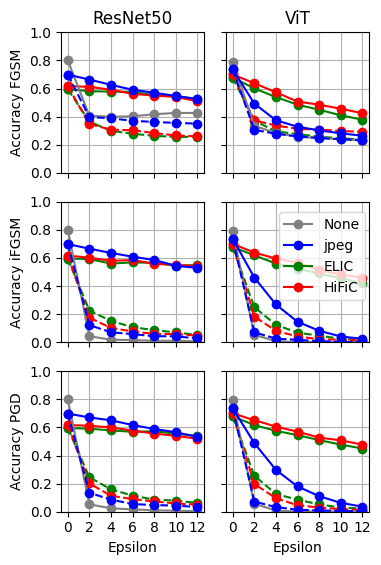

In [58]:
def plot_row(df,title,ax,attack,legend = False):
    """
    This function takes a list of Pandas DataFrames with one row each 
    and plots the values in this row.
    
    Parameters:
        dataframes (list): List of Pandas DataFrames, each containing only one row.
    
    Returns:
        None
    """
    # fig, ay = plt.subplots()
    
    for i in range(len(df)):
        if df.iloc[i,3]:
            ax.plot([0,2,4,6,8,10,12], df.iloc[i,4:], marker='o', label='_nolegend_',color=colors[df.iloc[i,2]],linestyle='dashed')
        else:
            ax.plot([0,2,4,6,8,10,12], df.iloc[i,4:], marker='o', label=df.iloc[i,2],color=colors[df.iloc[i,2]])
    ax.set_xlabel('Epsilon')
    ax.set_ylabel('Accuracy '+attack)
    # ax.set_yticks(np.arange(0.0, 1.1, 0.1))
    ax.set_xticks(np.arange(0, 14, 2))
    ax.set_ylim(0.0, 1.00)
   
    order = [2,3,0,1]
    handles, labels = ax.get_legend_handles_labels()
    if legend:
        ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(.32, 0.25), loc='lower left')
    # plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    return ax

attacks = 'FGSM,iFGSM,PGD'.split(',')
# fig, axes = plt.subplots(3,2,figsize=(5,6), sharex=True, sharey=True)
fig, axes = plt.subplots(3,2,figsize=(4.0,5.75), sharex=True, sharey=True)
# gs = fig.add_gridspec(3,2, hspace = 0.01, wspace=0.01)
# (ax1, ax2),( ax3, ax4),(ax5, ax6) = gs.subplots(sharex='col', sharey='row')
# axs = [ax1,ax2,ax3,ax4,ax5,ax6]
axs = axes.flatten()

i = 0
for attack in attacks:
    for model in models:
        df = results_1000.loc[results_1000['attack'] == attack].loc[results_1000['model_name'] == model]
        legend = i == 3
        plot_row(df,attack +'_' +model,axs[i],attack,legend)
        i += 1
for ax,title in zip(axs,'ResNet50,ViT'.split(',')):
    ax.set_title(title)
for ax in fig.get_axes():
    ax.label_outer()

fig.tight_layout()

fig.savefig('l_inf_1000.pdf',format='pdf',bbox_inches='tight')
# fig.savefig('l_inf_1000.svg',format='svg',bbox_inches='tight')